In [1]:
import jax.numpy as np
from jax import jit
from discopy import Tensor
Tensor.np = np

import discopy

In [ ]:
# Put in some wrong entries 1 character or not names,spam sentences

https://discopy.readthedocs.io/en/main/discopy/quantum.circuit.html
bottom has IQP Ansatz

In [3]:
#******************************************
# Generate your corpus
#******************************************
# sentences can be of the `word1 word2 word3 ...`
# if you are generating the diagrams using templates
# then you may want to consider adding POS tags (N, V, Adj) for each word
# labels should be of the form [0,1] or [1,0] for binary classification


# Vocab
from discopy import Word, Ty, Cup, Id, grammar
from sympy.abc import phi
from time import time
from discopy.grammar import brute_force

s, n = Ty('s'), Ty('n')
Jaz = Word('Alice', n)
Jane = Word('Jane', n)
Juniper = Word('Juniper', n)
Alice = Word('Alice', n)
loves = Word('loves', n.r @ s @ n.l)
despises = Word('depises', n.r @ s @ n.l)
tolerates = Word('tolerates', n.r @ s @ n.l)
glares_at = Word('glares at', n.r @ s @ n.l)
attacks = Word('attacks', n.r @ s @ n.l)
flees = Word('flees', n.r @ s @ n.l)
Bob =  Word('Bob', n)
who = Word('who', n.r @ n @ s.l @ n)
is_rich = Word('is rich', n.r @ s)

vocab = [Alice, loves, Bob,Jaz,Jane,Juniper,despises,tolerates,glares_at,attacks,flees]#, who, is_rich]


num_sentences = 26

gen, n_sentences = brute_force(*vocab), num_sentences
sentences= list()

print("Brute force search for grammatical sentences:")

start = time()
for i in range(n_sentences):
    diagram = next(gen)
    sentence = ' '.join(str(w)
        for w in diagram.boxes if isinstance(w, Word))
    sentences.append(sentence)
    #parsing.update({sentence: diagram})
    print(sentence)

print("\n{:.2f} seconds to generate {} sentences.".format(time() - start, n_sentences))

Brute force search for grammatical sentences:
Alice loves Alice
Alice loves Bob
Alice loves Alice
Alice loves Jane
Alice loves Juniper
Alice depises Alice
Alice depises Bob
Alice depises Alice
Alice depises Jane
Alice depises Juniper
Alice tolerates Alice
Alice tolerates Bob
Alice tolerates Alice
Alice tolerates Jane
Alice tolerates Juniper
Alice glares at Alice
Alice glares at Bob
Alice glares at Alice
Alice glares at Jane
Alice glares at Juniper
Alice attacks Alice
Alice attacks Bob
Alice attacks Alice
Alice attacks Jane
Alice attacks Juniper
Alice flees Alice

0.19 seconds to generate 26 sentences.


In [65]:
# TODO make sentences
import numpy as np

hl = int(num_sentences/4)
hlp = 3*hl

train_sentences = sentences[0:hlp]
#print(train_sentences)
hd = int((num_sentences - hlp)/2)
dev_sentences = sentences[hlp:hlp+hd]
test_sentences = sentences[hlp+hd]

#put in mispelled sentences


# TODO make labels
train_labels = [1]*(3*hlp)  #add mixture with mispellings
dev_labels = [1]*(hlp-hd)
test_labels = [1]*(num_sentences - (hd)- hlp)

train_labels = np.array(train_labels)
dev_labels = np.array(dev_labels)
test_labels = np.array(test_labels)

print(type(hl),hlp,hd)
print(len(train_sentences))
print(train_sentences)
print(dev_sentences)
print(test_sentences)



<class 'int'> 18 4
18
['Alice loves Alice', 'Alice loves Bob', 'Alice loves Alice', 'Alice loves Jane', 'Alice loves Juniper', 'Alice depises Alice', 'Alice depises Bob', 'Alice depises Alice', 'Alice depises Jane', 'Alice depises Juniper', 'Alice tolerates Alice', 'Alice tolerates Bob', 'Alice tolerates Alice', 'Alice tolerates Jane', 'Alice tolerates Juniper', 'Alice glares at Alice', 'Alice glares at Bob', 'Alice glares at Alice']
['Alice glares at Jane', 'Alice glares at Juniper', 'Alice attacks Alice', 'Alice attacks Bob']
Alice attacks Alice


In [57]:
[1]*5

[1, 1, 1, 1, 1]

# The online diagram generator tool
https://qnlp.cambridgequantum.com/generate.html

In [60]:
#******************************************
# Generate your diagrams
#******************************************
# TODO generate the DisCoCat diagrams for your corpus. There are 2 options:
# 1. Follow a few fixed templates (N V N, N V Adj N, ...)
# 2. Use the online tool to generate diagrams. 
# If you are using the online tool, consider writing a script.


def NVN_example(w0, w1, w2):
    words = Word(w0, n) @ Word(w1, n.r @ s @ n.l) @ Word(w2, n)
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    return words >> cups


# Suggestion: print out some of your DisCoCat diagrams using
# `grammar.draw` to check that they make sense.

# TODO implement sentence2diagram
# def sentence2diagram(lst):
#     def convert(lst):
#         return (lst[0].split())
#     return NVN_example(convert(lst))


def sentence2diagram(sentence):
    print(sentence)
    w0,w1,w2 = sentence.split(' ')
    words = Word(w0, n) @ Word(w1, n.r @ s @ n.l) @ Word(w2, n)
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    return words >> cups

print(train_sentences)
train_diagrams = [sentence2diagram(s) for s in train_sentences]
dev_diagrams = [sentence2diagram(s) for s in dev_sentences]
test_diagrams = [sentence2diagram(s) for s in test_sentences]


# example of how to make your template:
# then you use your pos tags to determine which template to use
def NVN_example(w0, w1, w2):
    words = Word(w0, n) @ Word(w1, n.r @ s @ n.l) @ Word(w2, n)
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    return words >> cups

grammar.draw(NVN_example('Alice', 'loves', 'Bob'))


['Alice loves Alice', 'Alice loves Bob', 'Alice loves Alice', 'Alice loves Jane', 'Alice loves Juniper', 'Alice depises Alice', 'Alice depises Bob', 'Alice depises Alice', 'Alice depises Jane', 'Alice depises Juniper', 'Alice tolerates Alice', 'Alice tolerates Bob', 'Alice tolerates Alice', 'Alice tolerates Jane', 'Alice tolerates Juniper', 'Alice glares at Alice', 'Alice glares at Bob', 'Alice glares at Alice']
Alice loves Alice
Alice loves Bob
Alice loves Alice
Alice loves Jane
Alice loves Juniper
Alice depises Alice
Alice depises Bob
Alice depises Alice
Alice depises Jane
Alice depises Juniper
Alice tolerates Alice
Alice tolerates Bob
Alice tolerates Alice
Alice tolerates Jane
Alice tolerates Juniper
Alice glares at Alice


ValueError: too many values to unpack (expected 3)

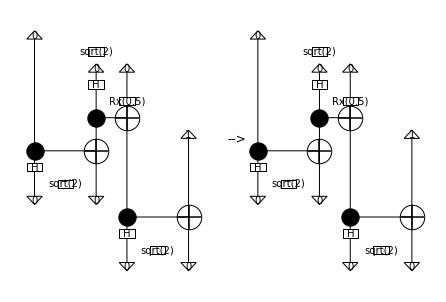

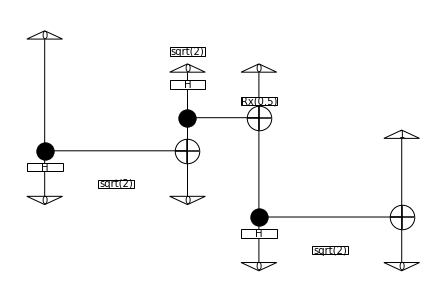

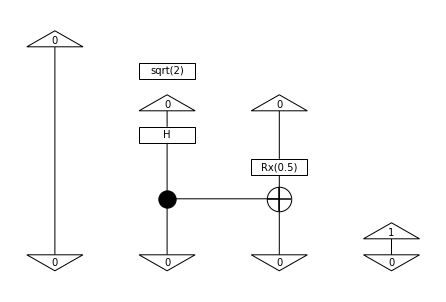

Tensor(dom=Dim(1), cod=Dim(1), array=[0.+0.j])


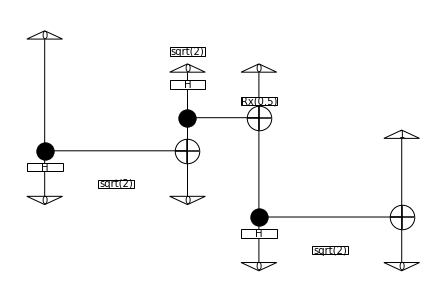

Tensor(dom=Dim(1), cod=Dim(1), array=[0.-0.99999988j])


In [262]:
#******************************************
# Generate your circuits
#******************************************
# TODO: Implement your own functorial ansatz conversion!
# The `qnlp-tutorial` has some code on this.
# https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html
# You may also find discopy's `IQPansatz` function useful.

# Suggestion: Draw some DisCoCat diagrams alongside their circuit diagrams
# and compare them

# TODO implement diagram2circuit
# diagram2circuit = None

from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP,circuit
#import numpy as np
from discopy import CircuitFunctor, qubit, Functor

# Ansatz for words with type `n`, e.g. 'Alice', 'Bob'
def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

# Ansatz for words with type `n.r @ s @ n.l`, e.g. 'loves'
def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

GHZ = sqrt(2) @ Ket(0, 0, 0)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)
sym = symbols("abc")
params0 = np.array([0.5, 1.0])

#diagram2circuit = CircuitFunctor(
diagram2circuit = circuit.Functor(
    ob={s: qubit ** 0, n: qubit ** 1},
    ar={Alice: Ket(0),
        loves: transitive_ansatz(params0[0]),
        Bob: Ket(1),
        who: GHZ,
        is_rich: intransitive_ansatz(params0[1])})


pltest = (Alice @ loves @ Bob) #>>H @ Circuit.id(1)
dimdd = (diagram2circuit(pltest)>>Bra(0,0,0,0))
pl = diagram2circuit(pltest)
train_circuits = [diagram2circuit(d) for d in train_diagrams]
dev_circuits = [diagram2circuit(d) for d in dev_diagrams]
test_circuits = [diagram2circuit(d) for d in test_diagrams]

# You can define parameterised circuits in DisCoPy
# using sympy variables, then substituting them using `lambdify`
from discopy import drawing
from discopy.quantum import Id, Rz, CX, CRz
from sympy.abc import symbols, phi


sym = symbols("abc")
params = np.array([0.5, 1.0])
circ = train_circuits[0]
#circ = Rz(sym) @ Id(1) >> CX >> CRz(phi)
drawing.equation(circ, circ.lambdify(sym, phi)(0.1, 0.2), symbol='-->')
from discopy.quantum import Ket, Bra
#(Ket(0, 0) >> circ.draw())
circ.draw()
#test =Ket(0,0) >> circ >> Bra(0,0)
(dimdd.lambdify(phi)(0.1)).draw()
print((dimdd.lambdify(phi)(0.1)).eval())
train_circuits[0].draw()
print(train_circuits[0].eval())

In [263]:
# These imports will come in handy when you want to run
# backend simulations.

# from qiskit import IBMQ
# from pytket.extensions.qiskit import AerBackend, IBMQBackend, IBMQEmulatorBackend

In [264]:
#******************************************
# Counting parameters in your model
#******************************************
from sympy import default_sort_key
circuits = train_circuits + dev_circuits + test_circuits

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted({
    s for circ in circuits for s in circ.free_symbols
}, key=default_sort_key)
print(parameters)
print(params)
#parameters =['a']

[]
[0.5 1. ]


In [265]:
def normalise(predicts):
    # apply smoothing to predicts
    predicts = np.abs(predicts - 1e-9)
    predicts = predicts / predicts.sum()
    return predicts

def BCE_loss(predicts, labels):
    cross_entropies = np.sum(labels * np.log2(predicts))
    cost = -1/len(labels) * np.sum(cross_entropies)

    return cost

In [266]:
def make_pred_fn(circuits):
    def pred_fn(params):
        predictions = np.array([
            normalise(np.abs(c.lambdify(*parameters)(*params).eval().array))
            for c in circuits
        ])
        return predictions

    return pred_fn
print((train_circuits[0]).eval())

Tensor(dom=Dim(1), cod=Dim(1), array=[0.-0.99999988j])


In [267]:
train_pred_fn = jit(make_pred_fn(train_circuits))
dev_pred_fn = jit(make_pred_fn(dev_circuits))
test_pred_fn = jit(make_pred_fn(test_circuits))

import numpy as onp
# onp.random.seed(0)

x0 = np.array(onp.random.random(len(parameters)))
print("Performing Just-In-Time compilation, this may take a while...")
train_pred_fn(x0)
dev_pred_fn(x0)

Performing Just-In-Time compilation, this may take a while...


DeviceArray([[1.]], dtype=float32)

In [268]:
def make_cost_fn(pred_fn, labels):
    costs = []
    accs = []
    params_list = []
    def cost_fn(params, **kwargs):
        predictions = pred_fn(params)

        cost = BCE_loss(predictions, labels)
        acc = np.sum(np.round(predictions) == labels) / len(labels) / 2
        costs.append(cost)
        accs.append(acc)
        params_list.append(params)

        return cost

    return cost_fn, costs, accs, params_list

In [269]:
# Rerun this cell onwards, so you can reuse the JITed prediction functions

train_cost_fn, train_costs, train_accs, spsa_params = make_cost_fn(train_pred_fn, train_labels)
dev_cost_fn, dev_costs, dev_accs, callback_params = make_cost_fn(dev_pred_fn, dev_labels)
test_cost_fn, test_costs, test_accs, _ = make_cost_fn(test_pred_fn, test_labels)

In [270]:
#pip install noisyopt

In [271]:
def evaluate(params, sentences, backend, n_shots=2**10, seed=0):
    circuits = [diagram2circuit(params)(parsing[s]) for s in train_sentences]
    results = [Circuit.eval(
                circuit,
                backend=backend,
                n_shots=n_shots,
                seed=seed,
                compilation=backend.default_compilation_pass(2)) for circuit in circuits]
    tensors = [np.abs(result.array)[0] for result in results]
    return tensors

In [272]:
from noisyopt import minimizeSPSA
minimizeSPSA(train_cost_fn, x0=x0, a=0.13, c=0.1, niter=2000, callback=dev_cost_fn)

     fun: DeviceArray(-0., dtype=float32)
 message: 'terminated after reaching max number of iterations'
    nfev: 4000
     nit: 2000
 success: True
       x: DeviceArray([], dtype=float32)

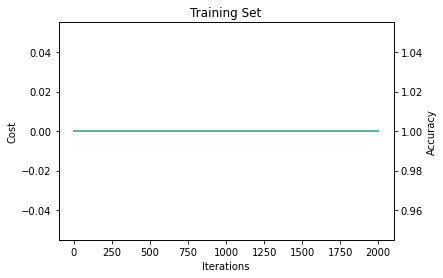

In [273]:
import matplotlib.pylab as plt
fig, ax1 = plt.subplots()
ax1.plot(train_costs[::2], color='#54436B')
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Training Set')

ax2 = ax1.twinx()
ax2.plot(train_accs[::2], color='#50CB93')
ax2.set_ylabel('Accuracy')
plt.show()

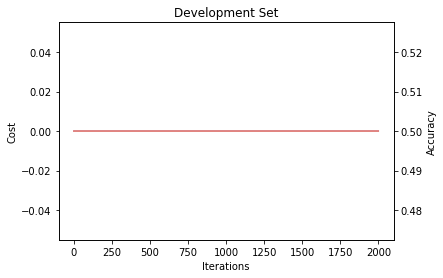

In [274]:
fig, ax1 = plt.subplots()
ax1.plot(dev_costs, color='#A03C78')
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Development Set')

ax2 = ax1.twinx()
ax2.plot(dev_accs, color='#ED8E7C')
ax2.set_ylabel('Accuracy')
plt.show()

In [275]:
# when you are happy with the development set results
# run your model on the testing set

# for p in callback_params:
#     test_cost_fn(p)

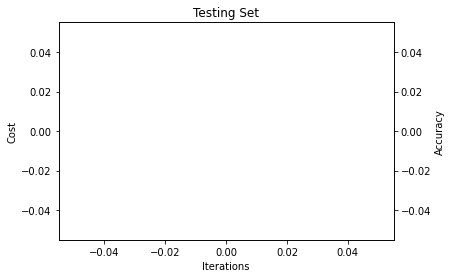

In [276]:
fig, ax1 = plt.subplots()
ax1.plot(test_costs, color='#7C83FD')
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Testing Set')

ax2 = ax1.twinx()
ax2.plot(test_accs, color='#96BAFF')
ax2.set_ylabel('Accuracy')
plt.show()

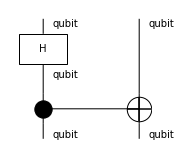

In [257]:
from discopy.quantum import qubit, H, Id, CX, QuantumGate
from discopy import Dim

assert H == QuantumGate("H", 1, 1 / np.sqrt(2) * np.array([1, 1, 1, -1]), _dagger=None)

circuit = H @ Id(qubit) >> CX

circuit.draw(figsize=(2, 2), draw_type_labels=True, margins=(.1, .1))

In [258]:
assert H.eval() == H.array
assert Id(qubit).eval() == Tensor.id(Dim(2))

assert circuit.eval() == H.eval() @ Id(qubit).eval() >> CX.eval()

H.eval()

Tensor(dom=Dim(2), cod=Dim(2), array=[0.70710677, 0.70710677, 0.70710677, -0.70710677])

amplitude:


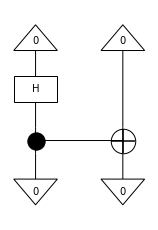

probability: 0.4999999701976776


In [259]:
from discopy.quantum import Bra

experiment = Ket(0, 0) >> circuit >> Bra(0, 0)

print("amplitude:")
experiment.draw(figsize=(2, 3))
amplitude = experiment.eval().array[0]

probability = abs(amplitude) ** 2
print("probability: {}".format(probability))